<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/IBM_Quantum_Docs_HelloWorld_Scaletolargenumbersofqubits_Runtime_Estimator_Primitives_mkbahk_20241021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

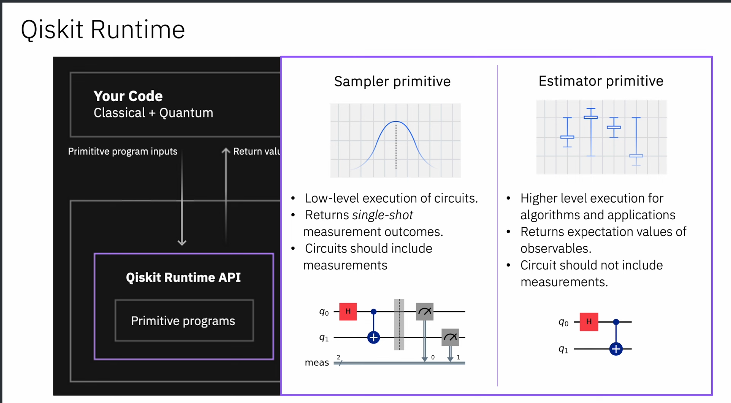

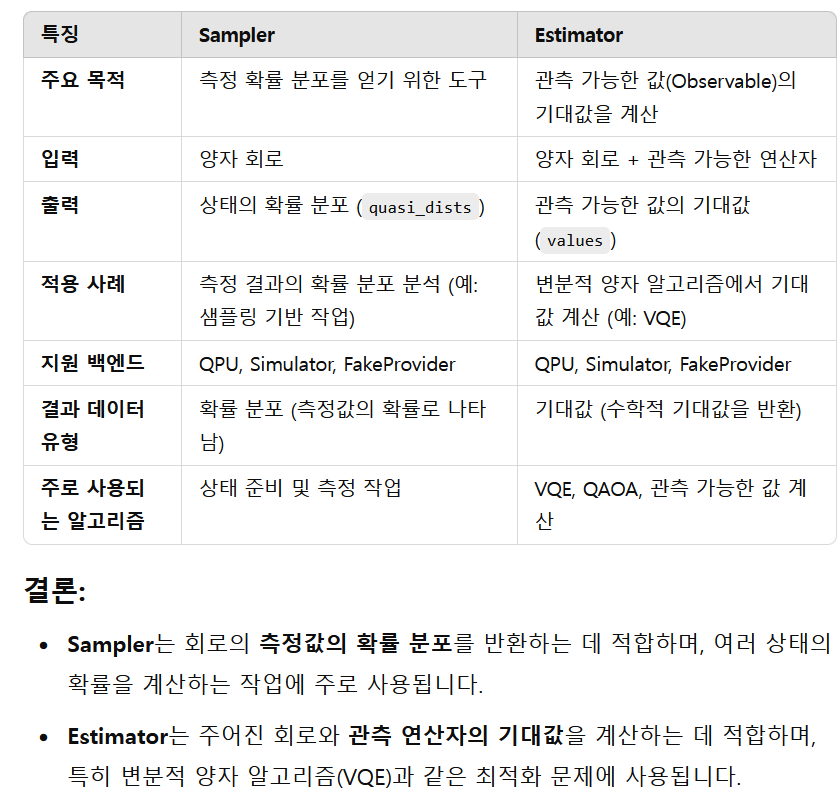

In [ ]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-ibm-runtime==0.31.0
#%pip install qiskit-ibm-runtime==0.30.0
%pip install qiskit-transpiler-service==0.4.10
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=52b5bac063cbb82795856a12f7cb8dd11e74d770c55c1a646b95e81d19319a46
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%pip show qiskit qiskit-ibm-runtime qiskit-transpiler-service qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import, qiskit-transpiler-service
---
Name: qiskit-ibm-runtime
Version: 0.31.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 
---
Name: qiskit-transpiler-service


#Step 1. Map the problem to a quantum-native format

In [ ]:
from qiskit import QuantumCircuit

def get_qc_for_n_qubit_GHZ_state(n: int) -> QuantumCircuit:
    """This function will create a qiskit.QuantumCircuit (qc) for an n-qubit GHZ state.

    Args:
        n (int): Number of qubits in the n-qubit GHZ state

    Returns:
        QuantumCircuit: Quantum circuit that generate the n-qubit GHZ state, assuming all qubits start in the 0 state
    """
    if isinstance(n, int) and n >= 2:
        qc = QuantumCircuit(n)
        qc.h(0)
        for i in range(n-1):
            qc.cx(i, i+1)
    else:
        raise Exception("n is not a valid input")
    ###if
    return qc
###def

In [ ]:
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
n = 20
qc = get_qc_for_n_qubit_GHZ_state(n)

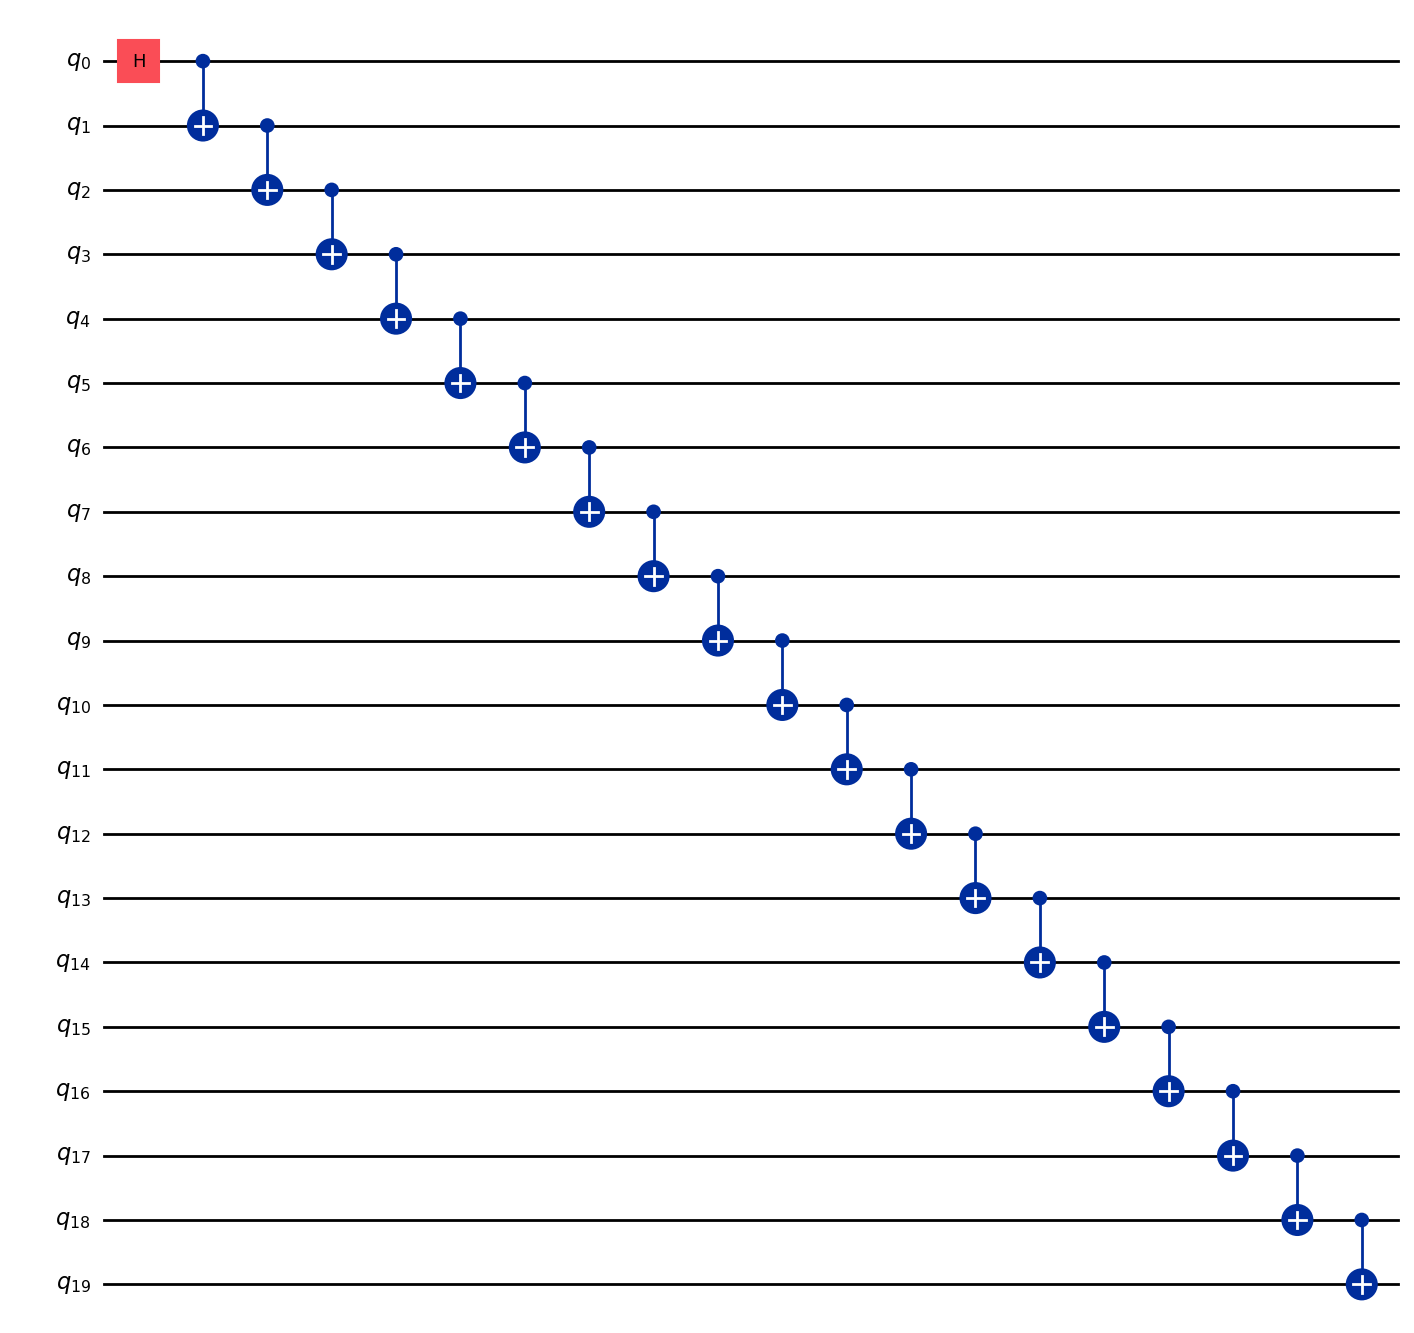

In [ ]:
qc.draw('mpl')

In [ ]:
from qiskit.quantum_info import SparsePauliOp

# ZZII...II, ZIZI...II, ... , ZIII...IZ
operator_strings = ['Z' + 'I'*i + 'Z' + 'I'*(n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator) for operator in operator_strings]

['ZZIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIII', 'ZIIIIIIIIIIZIIIIIIII', 'ZIIIIIIIIIIIZIIIIIII', 'ZIIIIIIIIIIIIZIIIIII', 'ZIIIIIIIIIIIIIZIIIII', 'ZIIIIIIIIIIIIIIZIIII', 'ZIIIIIIIIIIIIIIIZIII', 'ZIIIIIIIIIIIIIIIIZII', 'ZIIIIIIIIIIIIIIIIIZI', 'ZIIIIIIIIIIIIIIIIIIZ']
19


#Step 2. Optimize the circuits and operators

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

# Connecting runtime account
service = QiskitRuntimeService(channel="ibm_quantum", token="")
#service.save_account(channel="ibm_quantum", token="YOUR_API_TOKEN")
#backends = service.least_busy(min_num_qubits=2)
#service.backends("ibm_brisbane")
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [ ]:
#backend = service.backends()[0]
#estimator = Estimator(backend)

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend = service.least_busy(simulator=False, operational=True, min_num_qubits=100)
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

isa_circuit = pm.run(qc)
isa_operators_list = [op.apply_layout(isa_circuit.layout) for op in operators]

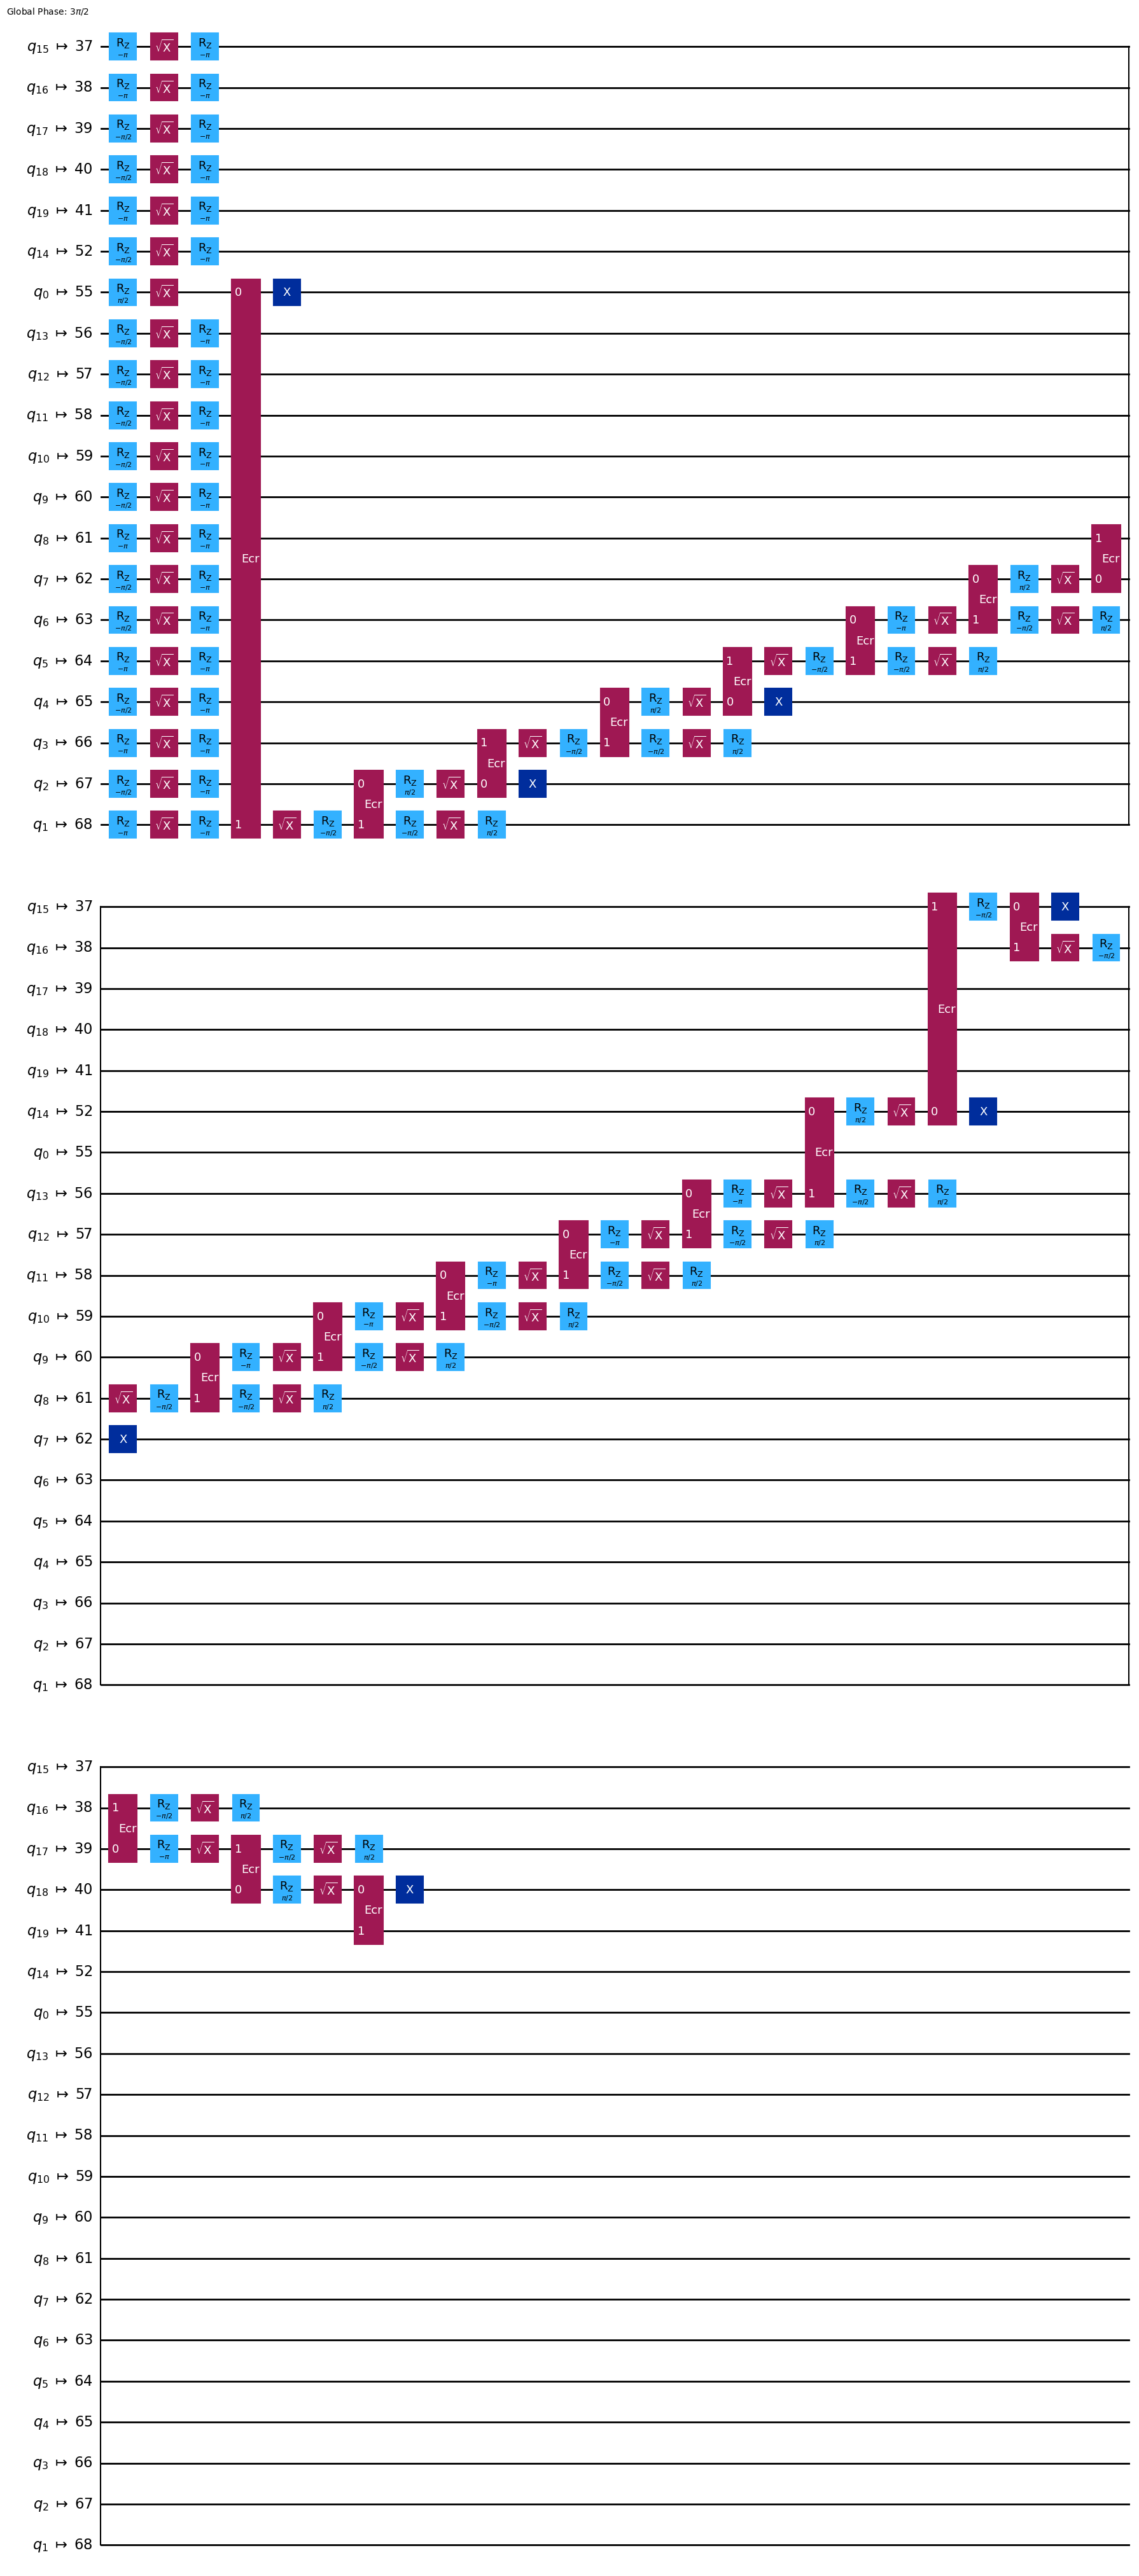

In [ ]:
isa_circuit.draw('mpl', idle_wires=False)

Qiskit-runtime-Service는 이전의 확률분포 반환에서 추가적으로 데이터를 반환하는 두 가지 방법을 제공합니다.
1.   측정하기로 선택한 큐비트 집합에 대한 확률 분포

```
# 회로 실행 및 결과 얻기
job = sampler.run(circuit)
result = job.result()
counts = result.quasi_dists[0]
# 결과 출력
print(counts)
```

2.   관측 가능한 값의 기대값

```
# 회로 실행 및 결과 얻기
job = estimator.run(observable, circuit)
result = job.result()
expectation_value = result.values[0]
# 결과 출력
print(expectation_value)
```


#Step 3. Execute using the quantum primitives

In [ ]:
from qiskit_ibm_runtime import EstimatorOptions
from qiskit_ibm_runtime import EstimatorV2 as Estimator

options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

# Create an Estimator object
estimator = Estimator(backend, options=options)

In [ ]:
# Submit the circuit to Estimator
job = estimator.run([(isa_circuit, isa_operators_list)])
job_id = job.job_id()
print(job_id)

cwayzn62802g0085xqr0


In [ ]:
print(job.status())

DONE


In [ ]:
result = job.result()[0]
result

PubResult(data=DataBin(evs=np.ndarray(<shape=(19,), dtype=float64>), stds=np.ndarray(<shape=(19,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(19,), dtype=float64>), shape=(19,)), metadata={'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})

#Step 4. Analyze the results

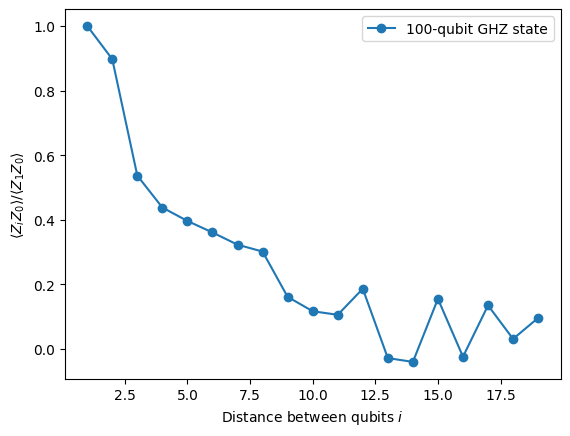

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit_ibm_runtime import QiskitRuntimeService

# data
data = list(range(1, len(operators)+1)) # Distance between the Z operators

values = result.data.evs # Expectation value at each Z operator.
values = [v / values[0] for v in values] # Normalize the expectation values to evaluate how they decay with distance.

# plotting graph
plt.plot(data, values, marker='o', label='100-qubit GHZ state')
plt.xlabel('Distance between qubits $i$')
plt.ylabel(r'$\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $')
plt.legend()
plt.show()